In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
pd.set_option("display.max_columns", None)

In [16]:
df = pd.read_csv("df3.csv")

In [17]:
df["Fighter_Current_Win_Streak"]

0        0
1        1
2        2
3        0
4        3
        ..
11997    3
11998    4
11999    1
12000    0
12001    1
Name: Fighter_Current_Win_Streak, Length: 12002, dtype: int64

In [18]:
df = df[~((df["Method"] == "CNC") | (df["Method"] == "DQ"))]

In [19]:
new_cols_added = []

In [21]:
for i in ["SLpM:_x", "Str. Acc.:_x", "SApM:_x", "Str. Def:_x", "TD Avg.:_x", "TD Acc.:_x", "TD Def.:_x", "Sub. Avg.:_x"]:
    new_name = i.replace("_x", "_Style")
    opp_name = i.replace("x", "y")
    df[new_name] = df[i]/(df[i] + df[opp_name] + 1e-6)
    new_cols_added.append(new_name)
    

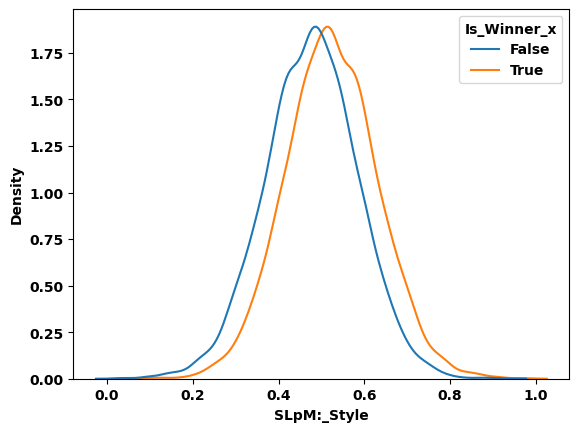

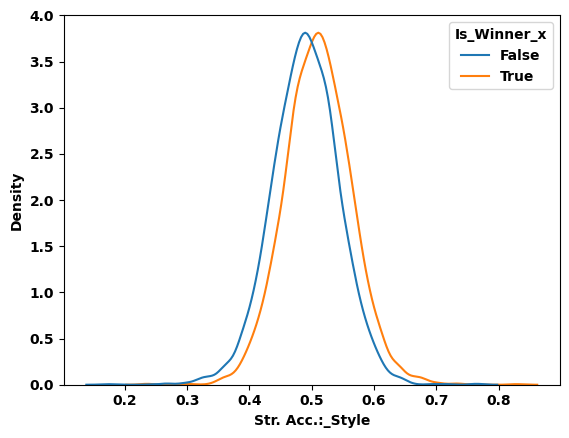

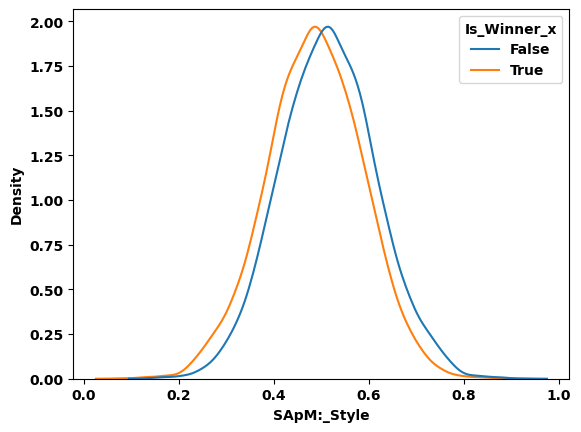

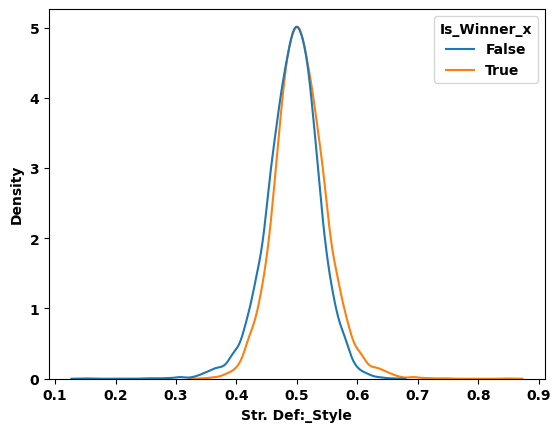

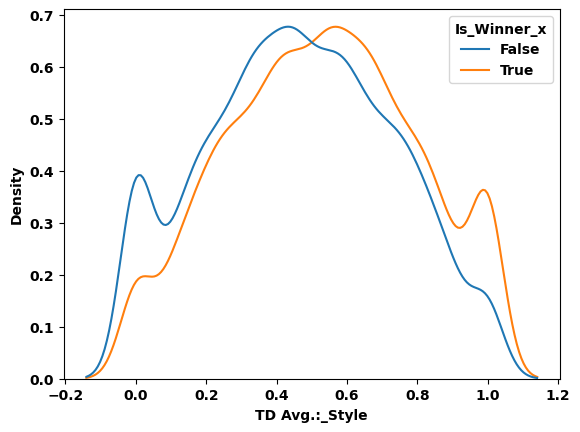

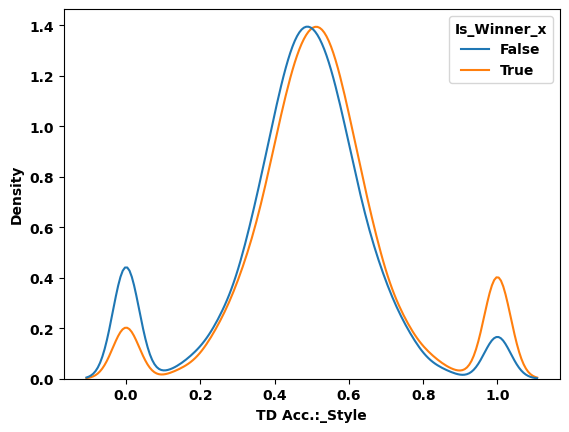

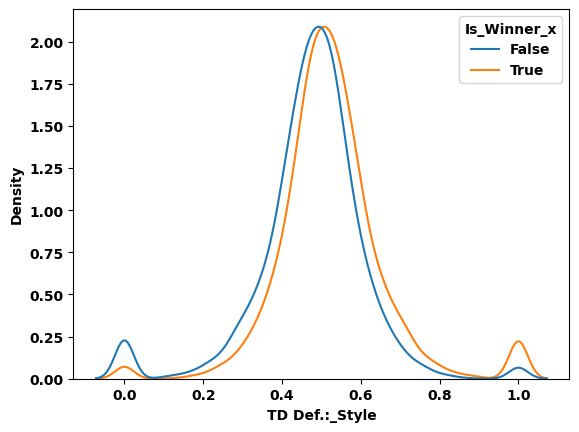

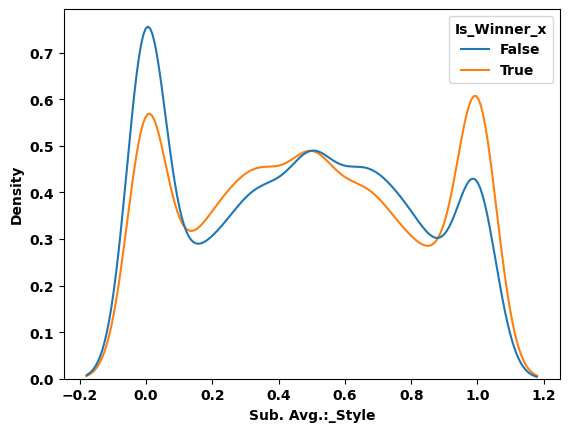

In [25]:
for i in new_cols_added:
    sns.kdeplot(data=df, x = i, hue="Is_Winner_x")
    plt.show()

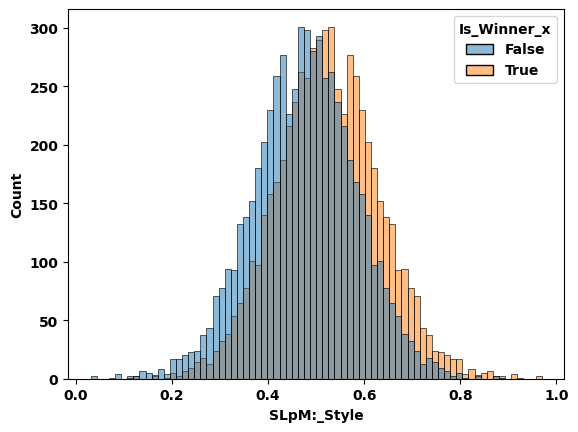

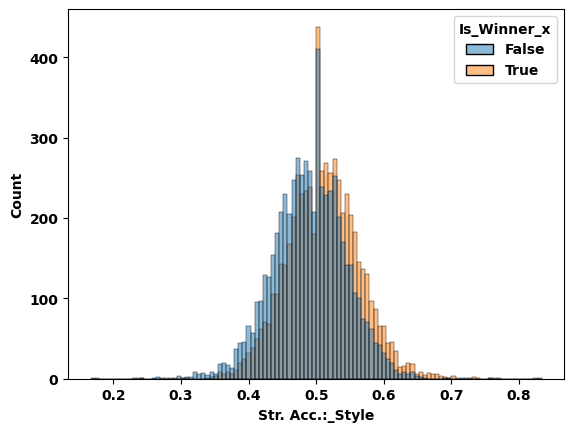

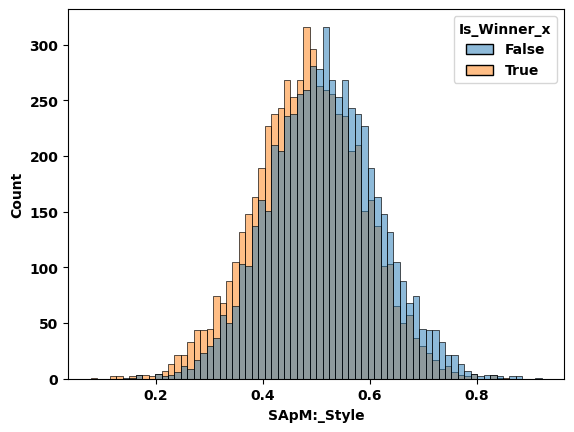

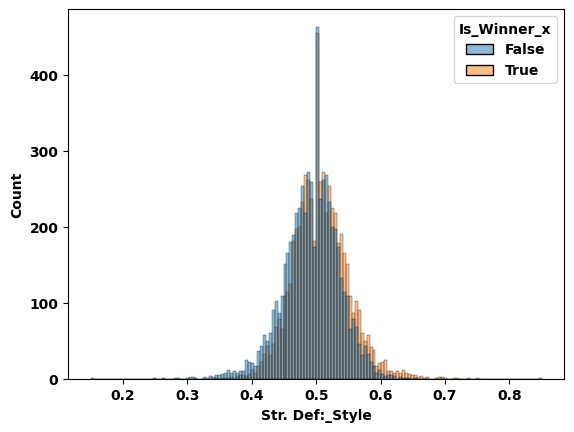

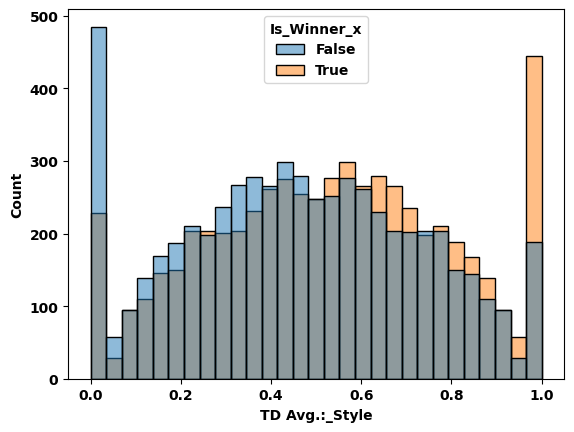

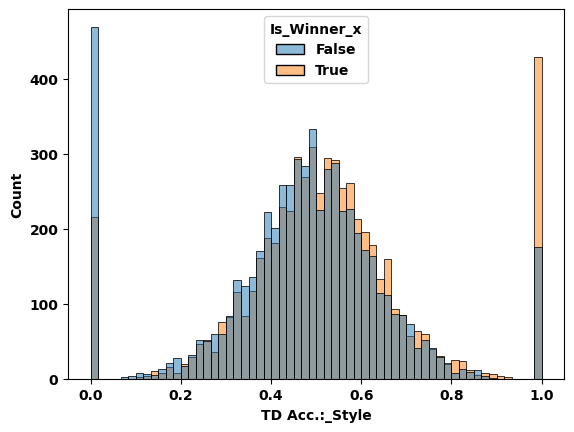

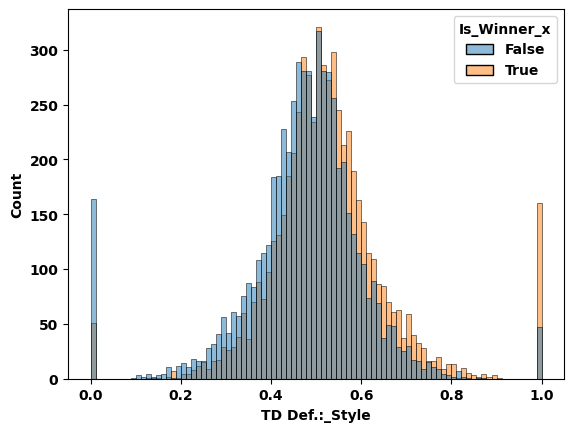

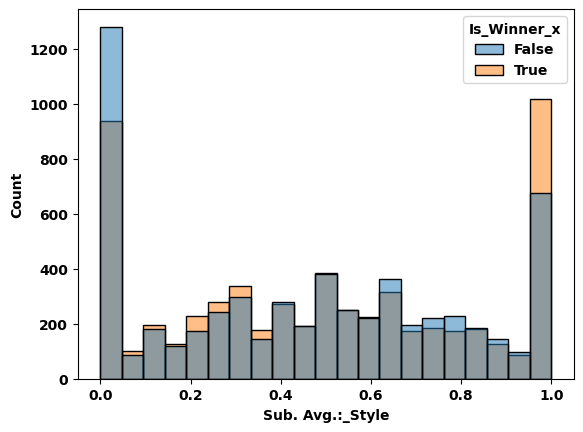

In [27]:
for i in new_cols_added:
    sns.histplot(data=df, x = i, hue="Is_Winner_x")
    plt.show()

<Axes: xlabel='Current_Win_Streak_Comparison', ylabel='Density'>

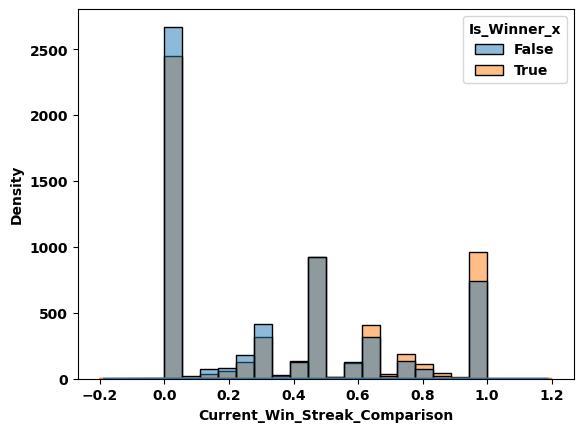

In [28]:
df["Current_Win_Streak_Comparison"] = df["Fighter_Current_Win_Streak"] / (df["Fighter_Current_Win_Streak"] + df["Opponent_Current_Win_Streak"] + 1e-6)
new_cols_added.append("Current_Win_Streak_Comparison")
sns.kdeplot(data=df, x= "Current_Win_Streak_Comparison", hue="Is_Winner_x")
sns.histplot(data=df, x= "Current_Win_Streak_Comparison", hue="Is_Winner_x")

In [29]:
df["Current_Win_Streak_Comparison"].isna().sum()

0

In [30]:
#Interaction Stats:
#Danger level of opponent: how much they throw, how much they land, and how many shots they win by KO, feature seems very useless
df["Fighter_Volume_x_Accuracy_x_KO%"] = df["SLpM:_x"] * df["Str. Acc.:_x"] * df["Fighter_Wins_By_KO_%"]
df["Opponent_Volume_x_Accuracy_x_KO%"] = df["SLpM:_y"] * df["Str. Acc.:_y"] * df["Opponent_Wins_By_KO_%"]
df["Volume_x_Accuracy_x_KO%_Style"] = df["Fighter_Volume_x_Accuracy_x_KO%"] / (df["Opponent_Volume_x_Accuracy_x_KO%"] + df["Fighter_Volume_x_Accuracy_x_KO%"] + 1e-6) 

In [31]:
df[["Volume_x_Accuracy_x_KO%_Style", "Fighter_Volume_x_Accuracy_x_KO%"]].isna().sum()

Volume_x_Accuracy_x_KO%_Style      14
Fighter_Volume_x_Accuracy_x_KO%     7
dtype: int64

<Axes: xlabel='Volume_x_Accuracy_x_KO%_Style', ylabel='Density'>

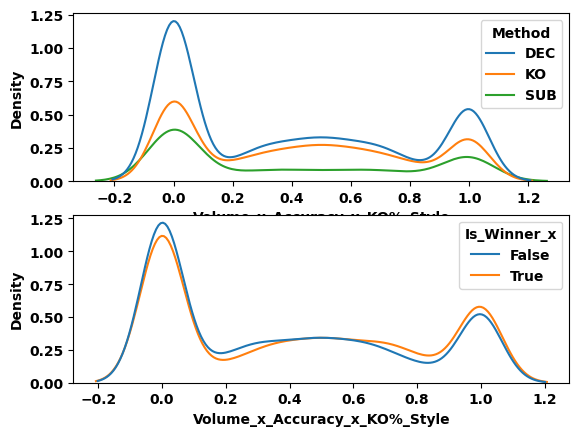

In [32]:
fig, ax = plt.subplots(2)
sns.kdeplot(data=df, x = "Volume_x_Accuracy_x_KO%_Style", hue="Method", ax=ax[0])
sns.kdeplot(data=df, x = "Volume_x_Accuracy_x_KO%_Style", hue="Is_Winner_x", ax=ax[1])

In [33]:
#Volume and Accuracy
df["Fighter_Volume_x_Accuracy"] = df["SLpM:_x"] * df["Str. Acc.:_x"]
df["Opponent_Volume_x_Accuracy"] = df["SLpM:_y"] * df["Str. Acc.:_y"]
df["Volume_x_Accuracy_Style"] = df["Fighter_Volume_x_Accuracy"] / (df["Fighter_Volume_x_Accuracy"] + df["Opponent_Volume_x_Accuracy"])

<Axes: xlabel='Volume_x_Accuracy_Style', ylabel='Density'>

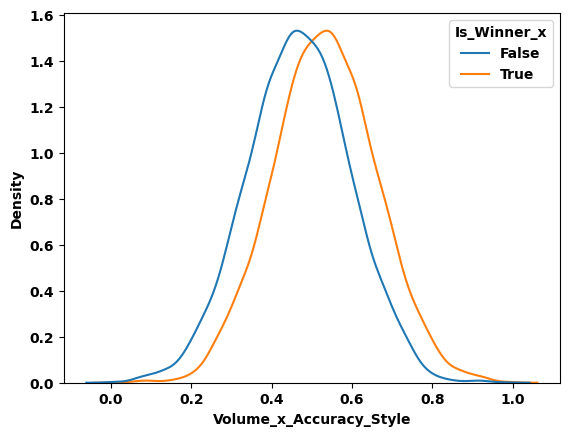

In [34]:
fig, ax = plt.subplots()
sns.kdeplot(data = df, x = "Volume_x_Accuracy_Style", hue="Is_Winner_x")

In [35]:
df

,Unnamed: 0.1,Unnamed: 0,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opponent_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance,Matchup_ID,Fighter_Prev_3_Missing,Opp_Prev_3_Missing,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_3_Stats_Missing,SLpM:_Ratio,Str. Acc.:_Ratio,SApM:_Ratio,Str. Def:_Ratio,TD Avg.:_Ratio,TD Acc.:_Ratio,TD Def.:_Ratio,Sub. Avg.:_Ratio,Ht._Ratio,Reach_Ratio,Overall_Win_%_Ratio,Wins_By_KO_%_Ratio,Wins_By_SUB_%_Ratio,Wins_By_DEC_%_Ratio,Loss_By_KO_%_Ratio,Loss_By_SUB_%_Ratio,Loss_By_DEC_%_Ratio,Current_Win_Streak_Ratio,Days_Since_Last_Fight_Ratio,SLpM:_Style,Str. Acc.:_Style,SApM:_Style,Str. Def:_Style,TD Avg.:_Style,TD Acc.:_Style,TD Def.:_Style,Sub. Avg.:_Style,Current_Win_Streak_Comparison,Fighter_Volume_x_Accuracy_x_KO%,Opponent_Volume_x_Accuracy_x_KO%,Volume_x_Accuracy_x_KO%_Style,Fighter_Volume_x_Accuracy,Opponent_Volume_x_Accuracy,Volume_x_Accuracy_Style
0,0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,273.0,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,0.0,0.666667,17.0,6.0,Middleweight,DEC,5,1.0,66.0,0.0,True,84,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.000000,0.5,0.000000,0.166667,0.0,0.333333,0.000000,0,3,Robert Whittaker,The Reaper,Reinier de Ridder,RdR,185 lbs.,4.54,0.43,3.41,0.59,0.80,0.38,0.81,0.0,72.0,73.0,3.25,0.60,2.21,0.44,4.74,0.38,0.66,1.4,76.0,78.0,False,"(Timestamp('2025-07-26 00:00:00'), ('Reinier d...",False,False,0.5,1.000000,1.333333,2.000000,0.739130,1.000000,0.0,-5.0,1.0,0.000000,8.666667,0.333333,189.0,-1.0,-0.333333,14.0,6.0,5.0,-2.0,11.0,3.0,1.0,2.0,0.019608,-0.666667,0.647059,0.500000,0.166667,0.333333,-3,-0.260870,1.29,-0.17,1.20,0.15,-3.94,0.00,0.15,-1.4,-4.0,-5.0,False,1.303529,0.893750,1.373832,1.104167,0.313589,1.000000,1.09

In [36]:
#Takeedown Accuracy * Average * Wins by SUB %
df["TD_Acc_x_Avg_SUB"] = df["TD Avg.:_x"] * df["TD Acc.:_x"] * (df["Fighter_Wins_By_SUB_%"] + 1)
df["Opp_TD_Acc_x_Avg_SUB"] = df["TD Avg.:_y"] * df["TD Acc.:_y"] * (df["Opponent_Wins_By_SUB_%"] + 1)

In [37]:
df["TD_Acc_x_Avg_SUB_Style"] = df["TD_Acc_x_Avg_SUB"] / (df["TD_Acc_x_Avg_SUB"] + df["Opp_TD_Acc_x_Avg_SUB"] + 1e-6)

In [38]:
# df["TD_Acc_x_Avg_SUB_Style"] = np.log1p(df["TD_Acc_x_Avg_SUB_Style"])

In [39]:
df[["TD_Acc_x_Avg_SUB_Style"]].isna().sum()

TD_Acc_x_Avg_SUB_Style    14
dtype: int64

<Axes: xlabel='TD_Acc_x_Avg_SUB_Style', ylabel='Count'>

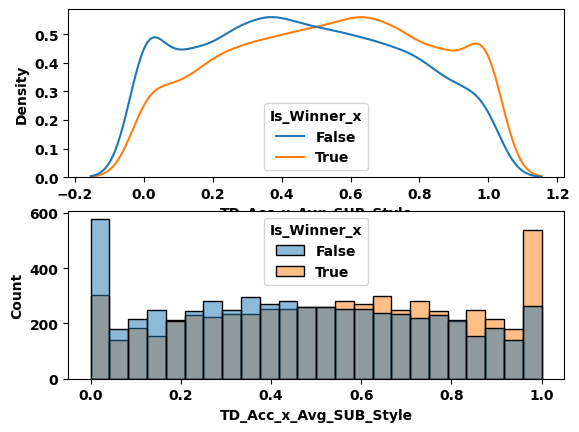

In [40]:
fig, ax = plt.subplots(2)
sns.kdeplot(data = df, x = "TD_Acc_x_Avg_SUB_Style", hue="Is_Winner_x", ax = ax[0])
sns.histplot(data = df, x = "TD_Acc_x_Avg_SUB_Style", hue="Is_Winner_x", ax = ax[1])

<Axes: xlabel='Opp_TD_Acc_x_Avg_SUB'>

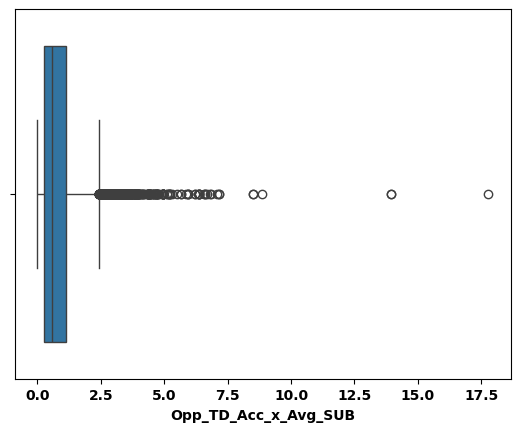

In [41]:
sns.boxplot(data=df, x = "Opp_TD_Acc_x_Avg_SUB")

<Axes: xlabel='TDD_vs_Opp_Grappling', ylabel='Density'>

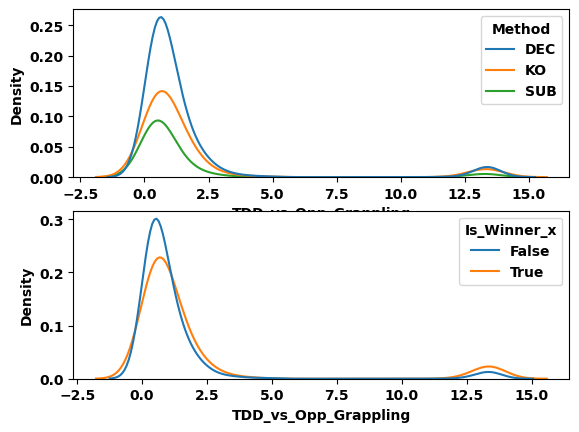

In [42]:
#Fighters Takedown Defense vs Opponents Danger in the grappling
fig, ax = plt.subplots(2)
df["TDD_vs_Opp_Grappling"] = df["TD Def.:_x"] / (df["Opp_TD_Acc_x_Avg_SUB"] + 1e-6)
df["TDD_vs_Opp_Grappling"] = np.log1p(df["TDD_vs_Opp_Grappling"])
sns.kdeplot(data = df, x = "TDD_vs_Opp_Grappling", hue="Method", ax = ax[0])
sns.kdeplot(data = df, x = "TDD_vs_Opp_Grappling", hue="Is_Winner_x", ax = ax[1])

<Axes: xlabel='TDD_vs_Opp_Grappling'>

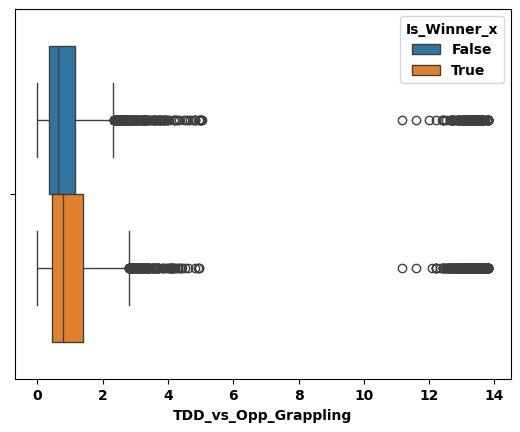

In [43]:
sns.boxplot(data=df, x = "TDD_vs_Opp_Grappling", hue="Is_Winner_x")

In [44]:
df["TDD_vs_Opp_Grappling"].describe()

count    11918.000000
mean         1.550578
std          2.922841
min          0.000000
25%          0.407848
50%          0.707538
75%          1.273509
max         13.815512
Name: TDD_vs_Opp_Grappling, dtype: float64

<Axes: xlabel='StrDef_vs_Opp_Str_Danger', ylabel='Density'>

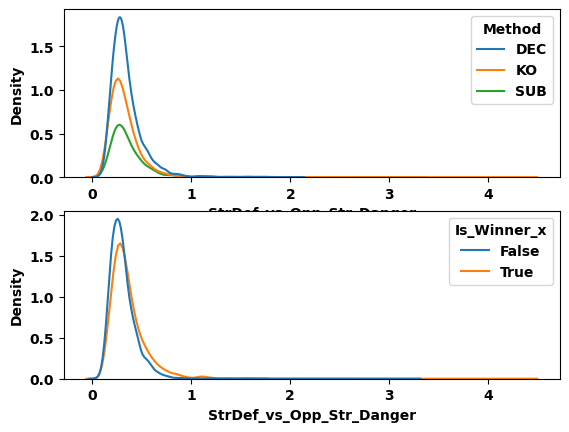

In [45]:
#Fighters striking defense vs opponents striking danger
fig, ax = plt.subplots(2)
df["StrDef_vs_Opp_Str_Danger"] = np.log1p(df["Str. Def:_x"] / (df["Opponent_Volume_x_Accuracy"] + 1e-6))
sns.kdeplot(data = df, x = "StrDef_vs_Opp_Str_Danger", hue="Method", ax = ax[0])
sns.kdeplot(data = df, x = "StrDef_vs_Opp_Str_Danger", hue="Is_Winner_x", ax = ax[1])

In [46]:
df["Overall_Stat_Interactions"] = np.log1p((df["Str. Def:_x"] / (df["Opponent_Volume_x_Accuracy"] + 1e-6)) + (df["TD Def.:_x"] / (df["Opp_TD_Acc_x_Avg_SUB"] + 1e-6)))
#Str Def vs Opp Str danger and TDD vs Opp Grappling

<Axes: xlabel='Overall_Stat_Interactions', ylabel='Count'>

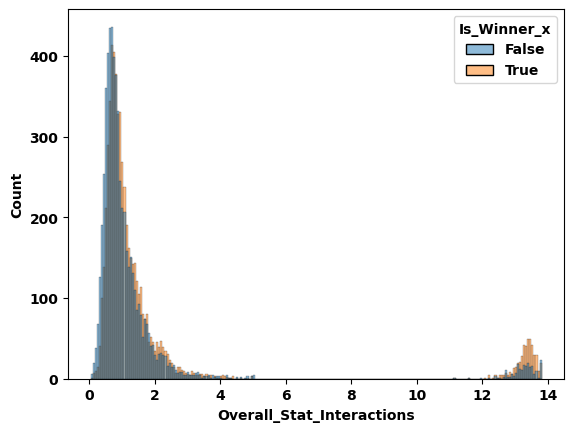

In [47]:
sns.histplot(data = df, x = "Overall_Stat_Interactions", hue= "Is_Winner_x")

In [48]:
df["Overall_Stat_Interactions_Fighter"] = np.log1p((df["Str. Def:_y"] / (df["Fighter_Volume_x_Accuracy"] + 1e-6)) + (df["TD Def.:_y"] / (df["TD_Acc_x_Avg_SUB"] + 1e-6))) 

In [49]:
new_cols_added.append("Overall_Stat_Interactions_Fighter")

<Axes: xlabel='Overall_Stat_Interactions_Fighter', ylabel='Count'>

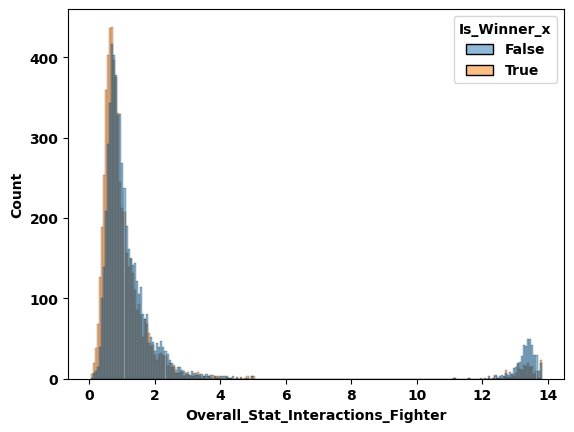

In [50]:
sns.histplot(data = df, x = "Overall_Stat_Interactions_Fighter", hue= "Is_Winner_x")

<Axes: xlabel='StrDef_vs_Opp_Str_Danger'>

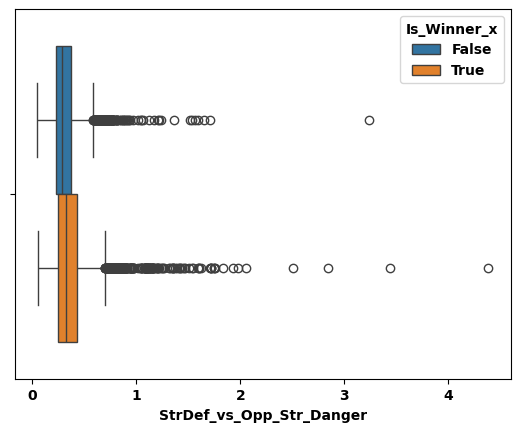

In [52]:
sns.boxplot(data=df, x = "StrDef_vs_Opp_Str_Danger", hue="Is_Winner_x")

<Axes: xlabel='Grappling_Threat_Style', ylabel='Density'>

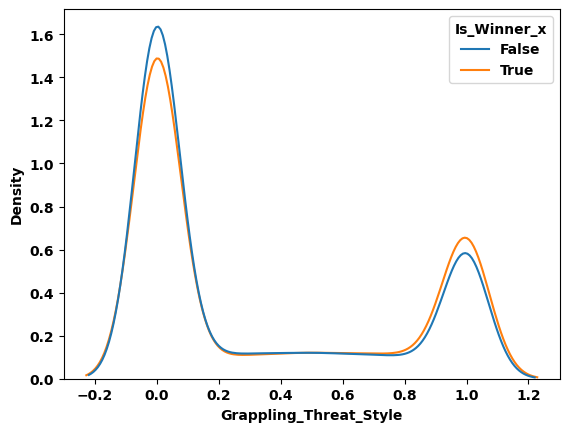

In [54]:
#Takeedown Accuracy * Average * Sub attempts (How dangerous of a grappler)
df["TD_Acc_x_Avg_SUB%"] = df["TD Avg.:_x"] * df["TD Acc.:_x"] * df["Fighter_Wins_By_SUB_%"]
df["Opp_TD_Acc_x_Avg_SUB%"] = df["TD Avg.:_y"] * df["TD Acc.:_y"] * df["Opponent_Wins_By_SUB_%"]

df["Grappling_Threat_Style"] = df["TD_Acc_x_Avg_SUB%"]/(df["Opp_TD_Acc_x_Avg_SUB%"] + df["TD_Acc_x_Avg_SUB%"] + 1e-6)

sns.kdeplot(data=df, x = "Grappling_Threat_Style", hue="Is_Winner_x")

<Axes: xlabel='TD_Acc_x_Avg_SUB%', ylabel='Density'>

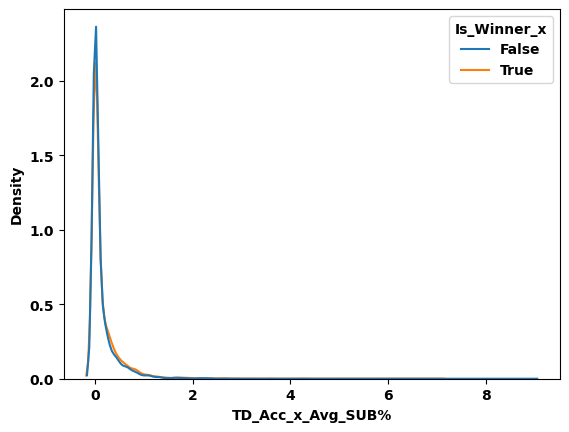

In [55]:
sns.kdeplot(data=df, x = "TD_Acc_x_Avg_SUB%", hue="Is_Winner_x")

In [89]:
df

,Unnamed: 0.1,Unnamed: 0,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opponent_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance,Matchup_ID,Fighter_Prev_3_Missing,Opp_Prev_3_Missing,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_3_Stats_Missing,SLpM:_Ratio,Str. Acc.:_Ratio,SApM:_Ratio,Str. Def:_Ratio,TD Avg.:_Ratio,TD Acc.:_Ratio,TD Def.:_Ratio,Sub. Avg.:_Ratio,Ht._Ratio,Reach_Ratio,Overall_Win_%_Ratio,Wins_By_KO_%_Ratio,Wins_By_SUB_%_Ratio,Wins_By_DEC_%_Ratio,Loss_By_KO_%_Ratio,Loss_By_SUB_%_Ratio,Loss_By_DEC_%_Ratio,Current_Win_Streak_Ratio,Days_Since_Last_Fight_Ratio,SLpM:_Style,Str. Acc.:_Style,SApM:_Style,Str. Def:_Style,TD Avg.:_Style,TD Acc.:_Style,TD Def.:_Style,Sub. Avg.:_Style,Current_Win_Streak_Comparison,Fighter_Volume_x_Accuracy_x_KO%,Opponent_Volume_x_Accuracy_x_KO%,Volume_x_Accuracy_x_KO%_Style,Fighter_Volume_x_Accuracy,Opponent_Volume_x_Accuracy,Volume_x_Accuracy_Style,TD_Acc_x_Avg_SUB,Opp_TD_Acc_x_Avg_SUB,TD_Acc_x_Avg_SUB_Style,TDD_vs_Opp_Grappling,StrDef_vs_Opp_Str_Danger,Overall_Stat_Interactions,Overall_Stat_Interactions_Fighter,TD_Acc_x_Avg_SUB%,Opp_TD_Acc_x_Avg_SUB%,Grappling_Threat_Style,Fighter_KD_x_Layoff
0,0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,273.0,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,0.0,0.666667,17.0,6.0,Middleweight,DEC,5,1.0,66.0,0.0,True,84,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.000000,0.5,0.000000,0.166667,0.0,0.333333,0.000000,0,3,Robert Whittaker,The Reaper,Reinier de Ridder,RdR,185 lbs.,4.54,0.43,3.41,0.59,0.80,0.38,0.81,0.0,72.0,73.0,3.25,0.60,2.21,0.44,4.74,0.38,0.66,1.4,76.0,78.0,False,"(Timestamp('2025-07-26 00:00:00'), ('Reinier d...",False,False,0.5,1.000000,1.333333,2.000000,0.739130,1.000000,0.0,-5.0,1.0,0.000000,8.666667

<Axes: xlabel='Days_Since_Last_Fight', ylabel='Count'>

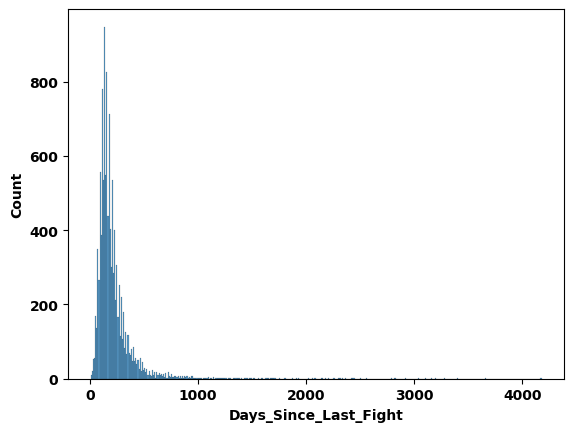

In [133]:
sns.histplot(data = df, x = "Days_Since_Last_Fight")

<Axes: xlabel='Fighter_KD_x_Layoff', ylabel='Count'>

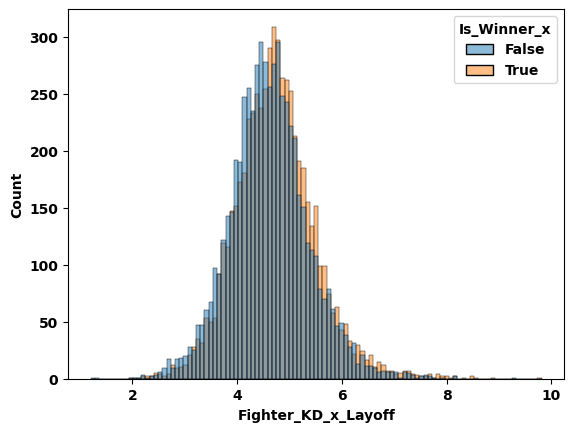

In [241]:
df["Fighter_KD_x_Layoff"] = np.log1p((df["Days_Since_Last_Fight"])/ (df["Opponent_Volume_x_Accuracy"] * (df["Prev_KD_Absorbed"] + 1)))
sns.histplot(data = df, x = "Fighter_KD_x_Layoff", hue = "Is_Winner_x")

<Axes: xlabel='Opponent_KD_x_Layoff', ylabel='Count'>

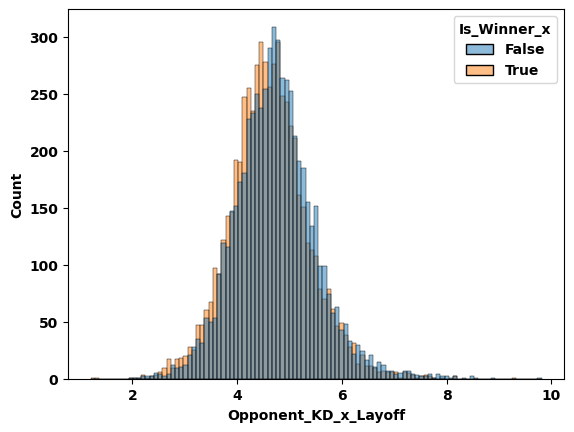

In [243]:
df["Opponent_KD_x_Layoff"] = np.log1p(df["Opp_Days_Since_Last_Fight"]/(df["Fighter_Volume_x_Accuracy"] * (df["Opp_Prev_KD_Absorbed"] + 1)))
sns.histplot(data = df, x = "Opponent_KD_x_Layoff", hue="Is_Winner_x")

In [246]:
df[["Grappling_Threat_Style", "TD_Acc_x_Avg_SUB%", "Opp_TD_Acc_x_Avg_SUB%"]].max()

Grappling_Threat_Style    1.000
TD_Acc_x_Avg_SUB%         8.888
Opp_TD_Acc_x_Avg_SUB%     8.888
dtype: float64

In [248]:
new_cols_added.extend(["StrDef_vs_Opp_Str_Danger", "TDD_vs_Opp_Grappling", "TD_Acc_x_Avg_SUB_Style", "Volume_x_Accuracy_Style", "Volume_x_Accuracy_x_KO%_Style", "Grappling_Threat_Style", "Fighter_KD_x_Layoff", "Opponent_KD_x_Layoff"])

In [250]:
new_cols_added = list(set(new_cols_added))

In [252]:
new_cols_added

['Overall_Stat_Interactions_Fighter',
 'Str. Acc.:_Style',
 'Str_Danger_vs_Opp_StrDef',
 'SApM:_Style',
 'TD Acc.:_Style',
 'Fighter_KD_x_Layoff',
 'Str. Def:_Style',
 'Sub. Avg.:_Style',
 'Volume_x_Accuracy_x_KO%_Style',
 'TD_Acc_x_Avg_SUB_Style',
 'TD Avg.:_Style',
 'TDD_vs_Opp_Grappling',
 'Fighter_Grappling_vs_OppTDD',
 'Opponent_KD_x_Layoff',
 'Str_Acc_vs_Opp_Str_Def',
 'TD_Acc_vs_Opp_TD_Def',
 'Current_Win_Streak_Comparison',
 'SLpM:_Style',
 'Volume_x_Accuracy_Style',
 'StrDef_vs_Opp_Str_Danger',
 'TD Def.:_Style',
 'Grappling_Threat_Style']

In [256]:
#Expected Strikes to land:
df["Str_Acc_vs_Opp_Str_Def"] = df["Str. Acc.:_x"] / df["Str. Def:_y"]
#Expected TDs to land:
df["TD_Acc_vs_Opp_TD_Def"] = df["TD Acc.:_x"] /( df["TD Def.:_y"] + 1)
new_cols_added.extend(["Str_Acc_vs_Opp_Str_Def", "TD_Acc_vs_Opp_TD_Def"])

<Axes: xlabel='Str_Danger_vs_Opp_StrDef', ylabel='Count'>

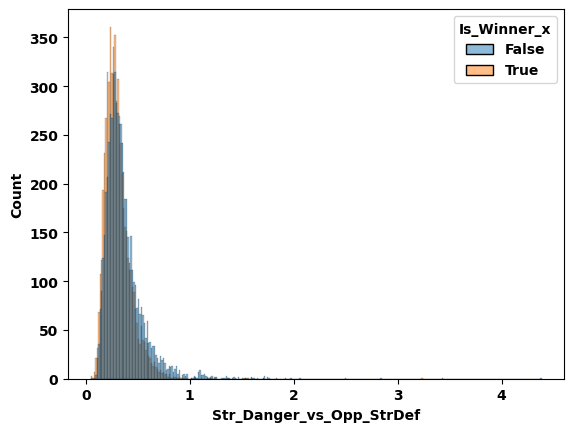

In [258]:
#Add fighter striking danger
df["Str_Danger_vs_Opp_StrDef"] =  np.log1p(df["Str. Def:_y"] / (df["Fighter_Volume_x_Accuracy"] + 1e-6))
sns.histplot(data = df, x = "Str_Danger_vs_Opp_StrDef", hue= "Is_Winner_x")

<Axes: xlabel='Str_Danger_vs_Opp_StrDef'>

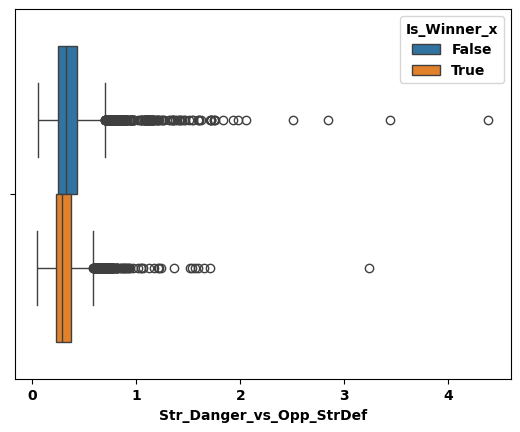

In [259]:
sns.boxplot(data = df, x = "Str_Danger_vs_Opp_StrDef", hue= "Is_Winner_x")

In [260]:
df["Fighter_Grappling_vs_OppTDD"] = np.log1p(df["TD Def.:_y"] / (df["TD_Acc_x_Avg_SUB"] + 1e-6))


<Axes: xlabel='Fighter_Grappling_vs_OppTDD', ylabel='Count'>

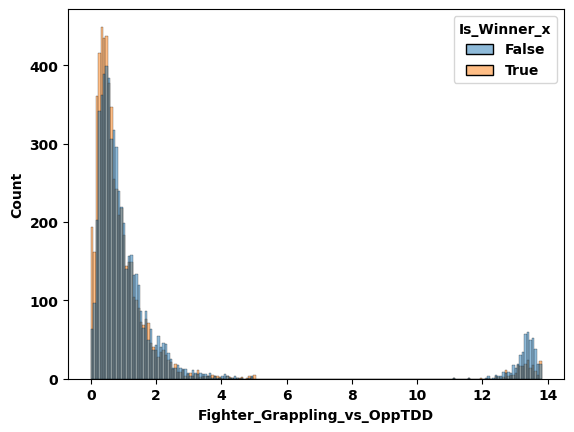

In [261]:
sns.histplot(data = df, x = "Fighter_Grappling_vs_OppTDD", hue="Is_Winner_x")

<Axes: xlabel='Fighter_Grappling_vs_OppTDD'>

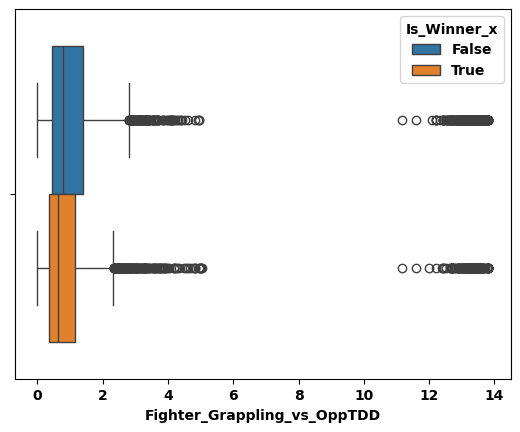

In [262]:
sns.boxplot(data = df, x = "Fighter_Grappling_vs_OppTDD", hue="Is_Winner_x")

In [264]:
new_cols_added.extend(["Str_Danger_vs_Opp_StrDef", "Fighter_Grappling_vs_OppTDD"])

In [268]:
# df["Str_Acc_vs_Opp_Str_Def"].describe()
df["TD_Acc_vs_Opp_TD_Def"].describe()

count    11918.000000
mean         0.242281
std          0.121205
min          0.000000
25%          0.175598
50%          0.234788
75%          0.303448
max          1.000000
Name: TD_Acc_vs_Opp_TD_Def, dtype: float64

<Axes: xlabel='Str_Acc_vs_Opp_Str_Def', ylabel='Density'>

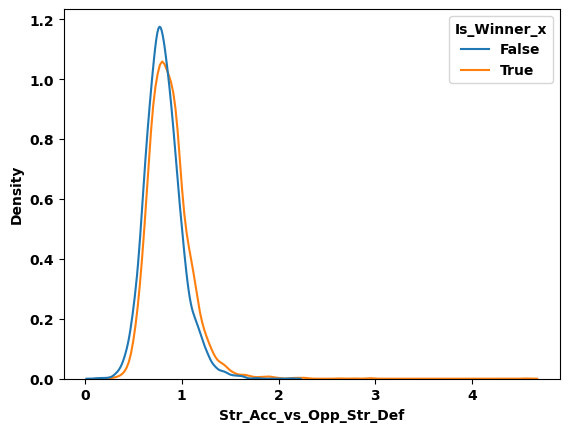

In [271]:
sns.kdeplot(data = df, x = "Str_Acc_vs_Opp_Str_Def", hue="Is_Winner_x")

<Axes: xlabel='TD_Acc_vs_Opp_TD_Def', ylabel='Density'>

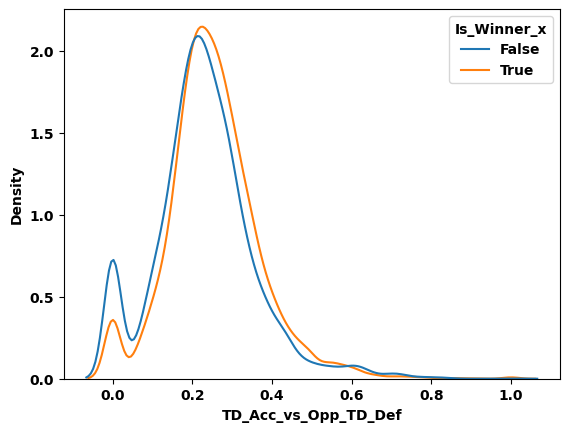

In [273]:
sns.kdeplot(data = df, x = "TD_Acc_vs_Opp_TD_Def", hue="Is_Winner_x")

In [274]:
num_bins = 4

# Apply quantile binning
df["SLpM_Bin"] = pd.qcut(df["SLpM:_Style"], q=num_bins, labels=False, duplicates="drop")
df["VolumeAcc_Bin"] = pd.qcut(df["Volume_x_Accuracy_Style"], q=num_bins, labels=False, duplicates="drop")
df["SApM_Bin"] = pd.qcut(df["SApM:_Style"], q=num_bins, labels=False, duplicates="drop")


In [278]:
df["SLpM:_Style"].describe()

count    11918.000000
mean         0.500000
std          0.110238
min          0.030899
25%          0.427044
50%          0.500000
75%          0.572955
max          0.969101
Name: SLpM:_Style, dtype: float64

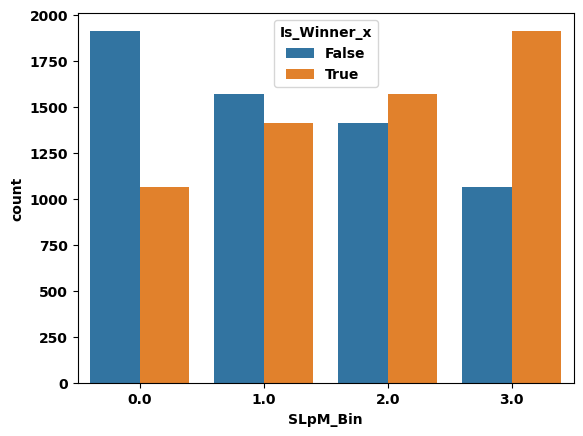

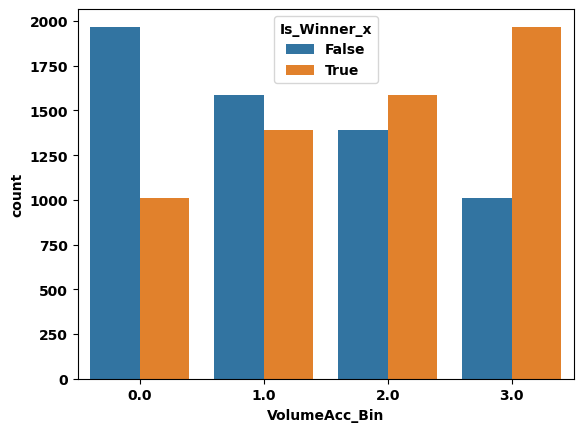

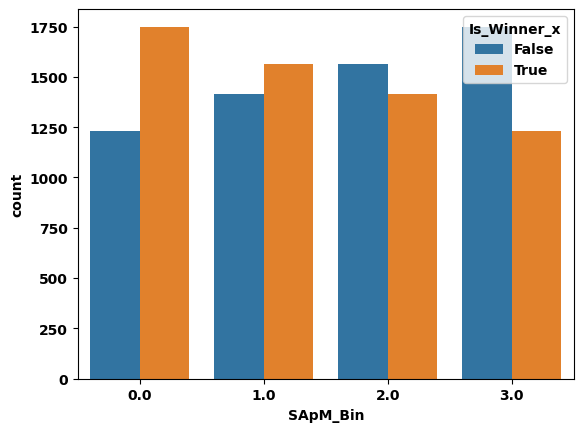

In [280]:
for i in ["SLpM_Bin", "VolumeAcc_Bin", "SApM_Bin"]:
    sns.countplot(data = df,x = i, hue="Is_Winner_x")
    plt.show()

In [281]:
features = [
    "SLpM_Bin", "VolumeAcc_Bin", "SApM_Bin",
    # optionally add your other original or engineered features too
]

In [284]:
new_cols_added + features

['Overall_Stat_Interactions_Fighter',
 'Str. Acc.:_Style',
 'Str_Danger_vs_Opp_StrDef',
 'SApM:_Style',
 'TD Acc.:_Style',
 'Fighter_KD_x_Layoff',
 'Str. Def:_Style',
 'Sub. Avg.:_Style',
 'Volume_x_Accuracy_x_KO%_Style',
 'TD_Acc_x_Avg_SUB_Style',
 'TD Avg.:_Style',
 'TDD_vs_Opp_Grappling',
 'Fighter_Grappling_vs_OppTDD',
 'Opponent_KD_x_Layoff',
 'Str_Acc_vs_Opp_Str_Def',
 'TD_Acc_vs_Opp_TD_Def',
 'Current_Win_Streak_Comparison',
 'SLpM:_Style',
 'Volume_x_Accuracy_Style',
 'StrDef_vs_Opp_Str_Danger',
 'TD Def.:_Style',
 'Grappling_Threat_Style',
 'Str_Acc_vs_Opp_Str_Def',
 'TD_Acc_vs_Opp_TD_Def',
 'Str_Danger_vs_Opp_StrDef',
 'Fighter_Grappling_vs_OppTDD',
 'SLpM_Bin',
 'VolumeAcc_Bin',
 'SApM_Bin']

In [286]:
df["Date"] = pd.to_datetime(df["Date"])

In [288]:
df.to_csv("new_df.csv")

In [316]:
#PREV_KD_CORRECTION
df["Prev_KD_Absorbed_Ratio"] = (df["Prev_KD_Absorbed"] + 1)/ (df["Opp_Prev_KD_Absorbed"] + 1)
df[["Date", "Fighter", "Opponent", "Prev_KD_Absorbed_Ratio"]].to_csv("prevkdfix.csv")

In [329]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opponent_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance,Matchup_ID,Fighter_Prev_3_Missing,Opp_Prev_3_Missing,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_3_Stats_Missing,SLpM:_Ratio,Str. Acc.:_Ratio,SApM:_Ratio,Str. Def:_Ratio,TD Avg.:_Ratio,TD Acc.:_Ratio,TD Def.:_Ratio,Sub. Avg.:_Ratio,Ht._Ratio,Reach_Ratio,Overall_Win_%_Ratio,Wins_By_KO_%_Ratio,Wins_By_SUB_%_Ratio,Wins_By_DEC_%_Ratio,Loss_By_KO_%_Ratio,Loss_By_SUB_%_Ratio,Loss_By_DEC_%_Ratio,Current_Win_Streak_Ratio,Days_Since_Last_Fight_Ratio,SLpM:_Style,Str. Acc.:_Style,SApM:_Style,Str. Def:_Style,TD Avg.:_Style,TD Acc.:_Style,TD Def.:_Style,Sub. Avg.:_Style,Current_Win_Streak_Comparison,Fighter_Volume_x_Accuracy_x_KO%,Opponent_Volume_x_Accuracy_x_KO%,Volume_x_Accuracy_x_KO%_Style,Fighter_Volume_x_Accuracy,Opponent_Volume_x_Accuracy,Volume_x_Accuracy_Style,TD_Acc_x_Avg_SUB,Opp_TD_Acc_x_Avg_SUB,TD_Acc_x_Avg_SUB_Style,TDD_vs_Opp_Grappling,StrDef_vs_Opp_Str_Danger,Overall_Stat_Interactions,Overall_Stat_Interactions_Fighter,TD_Acc_x_Avg_SUB%,Opp_TD_Acc_x_Avg_SUB%,Grappling_Threat_Style,Fighter_KD_x_Layoff,Opponent_KD_x_Layoff,Fighter_Str_Danger_x_Opp_Loss_KO%,Str_Acc_vs_Opp_Str_Def,TD_Acc_vs_Opp_TD_Def,Str_Danger_vs_Opp_StrDef,Fighter_Grappling_vs_OppTDD,SLpM_Bin,VolumeAcc_Bin,SApM_Bin
0,0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,273.0,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,0.0,0.666667,17.0,6.0,Middleweight,DEC,5,1.0,66.0,0.0,True,84,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.000000,0.5,0.000000,0.166667,0.0,0.333333,0.000000,0,3,Robert Whittaker,The Reaper,Reinier de Ridder,RdR,185 lbs.,4.54,0.43,3.41,0.59,0.80,0.38,0.81,0.0,72.0,73.0,3.25,0.60,2.21

In [331]:
#DF for the purposes of new feature engineering:
df.to_csv("newfeatures.csv")

In [231]:
X_train = df[df["Date"].dt.year < 2025][new_cols_added + features + old_cols]
y_train = df[df["Date"].dt.year < 2025]["Is_Winner_x"]

X_test = df[df["Date"].dt.year == 2025][new_cols_added + features + old_cols]
y_test = df[df["Date"].dt.year == 2025]["Is_Winner_x"]


In [232]:
rf = RandomForestClassifier(n_estimators=1500, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.6754032258064516
F1 Score: 0.6666666666666666


In [191]:
from sklearn.inspection import permutation_importance

In [163]:
df.drop(["Current_Win_Streak_Comparison", "StrDef_vs_Opp_Str_Danger", "SLpM_Bin", "Sub. Avg.:_Style", "SApM_Bin", "Grappling_Threat_Style", "TD Def.:_Style", "Volume_x_Accuracy_x_KO%_Style"], axis=1, inplace=True)

C:\Users\alexz\AppData\Local\Temp\ipykernel_100592\1192420621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Current_Win_Streak_Comparison", "StrDef_vs_Opp_Str_Danger", "SLpM_Bin", "Sub. Avg.:_Style", "SApM_Bin", "Grappling_Threat_Style", "TD Def.:_Style", "Volume_x_Accuracy_x_KO%_Style"], axis=1, inplace=True)


In [168]:
new_cols = [x for x in new_cols_added if x not in ["Current_Win_Streak_Comparison", "StrDef_vs_Opp_Str_Danger", "SLpM_Bin", "Sub. Avg.:_Style", "SApM_Bin", "Grappling_Threat_Style", "TD Def.:_Style", "Volume_x_Accuracy_x_KO%_Style"]]
new_cols

['TD Avg.:_Style',
 'SLpM:_Style',
 'TD Acc.:_Style',
 'TD_Acc_x_Avg_SUB_Style',
 'SApM:_Style',
 'Str. Acc.:_Style',
 'TDD_vs_Opp_Grappling',
 'Str. Def:_Style',
 'Volume_x_Accuracy_Style',
 'Str_Acc_vs_Opp_Str_Def',
 'TD_Acc_vs_Opp_TD_Def']

In [230]:
old_cols = list(set(['Prev_KD_Absorbed_Diff',
 'Prev_STR_Absorbed_Diff',
 'Prev_SUB_Faced_Diff',
 'Past_3_KD_Absorbed_Diff',
 'Past_3_STR_Absorbed_Diff',
 'Past_3_SUB_Faced_Diff',
 'Days_Since_Last_Fight_Diff',
 'Won_Last_Fight_Diff',
 'Prev_3_Fight_Win_Rate_Diff',
 'Wins_Before_Fight_Diff',
 'Losses_Before_Fight_Diff',
 'Wins_By_KO_Diff',
 'Wins_By_SUB_Diff',
 'Wins_By_DEC_Diff',
 'Loss_By_KO_Diff',
 'Loss_By_SUB_Diff',
 'Loss_By_DEC_Diff',
 'Wins_By_KO_%_Diff',
 'Wins_By_SUB_%_Diff',
 'Wins_By_DEC_%_Diff',
 'Loss_By_KO_%_Diff',
 'Loss_By_SUB_%_Diff',
 'Loss_By_DEC_%_Diff',
 'Current_Win_Streak_Diff',
 'Overall_Win_%_Diff',
 'SLpM:_Diff',
 'Str. Acc.:_Diff',
 'SApM:_Diff',
 'Str. Def:_Diff',
 'TD Avg.:_Diff',
 'TD Acc.:_Diff',
 'TD Def.:_Diff',
 'Sub. Avg.:_Diff',
 'Ht._Diff',
 'Reach_Diff',
 'Prev_KD_Absorbed_Ratio',
 'Past_3_KD_Absorbed_Ratio',
 'Past_3_SUB_Faced_Ratio',
 'Prev_SUB_Faced_Ratio',
 'Fighter_Overall_Win_%',
 'Opponent_Overall_Win_%',
 'SLpM:_Ratio',
 'Str. Acc.:_Ratio',
 'SApM:_Ratio',
 'Str. Def:_Ratio',
 'TD Avg.:_Ratio',
 'TD Acc.:_Ratio',
 'TD Def.:_Ratio',
 'Sub. Avg.:_Ratio',
 'Ht._Ratio',
 'Reach_Ratio',
 'Overall_Win_%_Ratio',
 'Overall_Win_%_Ratio',
 'Overall_Win_%_Ratio',
 'Wins_By_KO_%_Ratio',
 'Wins_By_SUB_%_Ratio',
 'Wins_By_DEC_%_Ratio',
 'Loss_By_KO_%_Ratio',
 'Loss_By_SUB_%_Ratio',
 'Loss_By_DEC_%_Ratio',
 'Current_Win_Streak_Ratio',
 'Days_Since_Last_Fight_Ratio']))

In [181]:
df5= df[old_cols + new_cols + ["Is_Winner_x", "Date"]]